In [15]:
#Importando as libs necessárias
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import requests
path = "../data/"

## Dados Abertos Câmara dos Deputados

Para este projeto iremos acessar a base de dados disponibilizada pelo Governo Federal afim de analisar os dados referentes aos gastos públicos dos nossos deputados e senadores. Esta política de dados abertos foi iniciada em 2016 no governo de Dilma Roussef, com o Decreto 8.777, que instaurou a [Política de Dados Abertos do Poder Executivo federal](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/D8777.htm). 


Sendo assim, iremos verificar, analisar, comparar, criar algumas perguntas/observações sobre os dados e reponde-las com os mesmos.

Esses dados estão disponibilizados nos portais de Dados Abertos do **Senado Federal** e da **Câmara dos Deputados**. 
 

### Escopo do trabalho

- Neste trabalho iremos usar alguns parâmetros para focar nossos esforços em dados mais proximos da nossa realidade, portanto iremos trabalhar apenas com  a analise dos parlamentares do estado do Nordeste.  
  
  
- Dessa forma, algumas pesquisas foram feitas anteriormente e durante o projeto, afim de tornar as comparações e analisés mais coerentes e consistentes para conseguirmos visualizar melhor e encontrar informações a partir dos gastos e dos dados disponibilizados pelo projeto **[serenata_de_amor](https://serenata.ai/),** que também sera amplamente utilizado neste trabalho.


* **Serenata de amor** é um projeto aberto que usa ciência de dados com a finalidade de fiscalizar gastos públicos e compartilhar as informações de forma acessível a qualquer pessoa. Faz uso da *Rosie*, uma inteligência artificial capaz de analisar os gastos reembolsados pela Cota para Exercício da Atividade Parlamentar *(CEAP)*, de deputados federais e senadores, feitos em exercício de sua função, identificando suspeitas e incentivando a população a questioná-los.
    * Para tornar estas informações acessiveis, foi criado *Jarbas* um site onde é possível navegar pelos gastos e descobrir mais sobre cada suspeita, de maneira simples e descomplicada, que é onde começa o trabalho de validar uma suspeita levantada pela Rosie.


> Para iniciar, necessitamos pegar os nossos DataFrames, que serão retirados do serenata, e atribui-los, de forma organizada, às nossas váriaveis.


> Iremos utilizar os dados dos deputados do nordeste, como dito anteriormentge, dos anos de 2018 e 2019, para poder ter algo mais rescente e também abrangir um ano de eleição para poder melhorar nossas comparações. 

> Utilizaremos a biblioteca *Requests* para fazer chamadas à API da Câmara e Senado.

In [2]:
# Capturando os dados da API das tabelas do serenata
deputados_Nordeste_2019 = requests.get("https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&ordem=ASC&ordenarPor=nome", headers={'Accept':'application/json'}).json()
deputados_Nordeste_2018 = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&dataInicio=2018-01-01&dataFim=2018-12-31', headers= {'Accept':'application/json'}).json()
df_deputados_serenata_2018 = pd.read_csv(path+'Ano-2018.csv', sep=';')
df_deputados_serenata_2019 = pd.read_csv(path+'Ano-2019.csv', sep=';')

Colocaremos os nomes dos deputados nordestinos, de 2018 e 2019, em váriaveis para facilitar nosso trabalho:

In [3]:
nomes_deputados_nordeste_2018 = [dep['nome'] for dep in deputados_Nordeste_2018['dados']]
nomes_deputados_nordeste_2019 = [dep['nome'] for dep in deputados_Nordeste_2019['dados']]

Selecionando os parlamentares apenas do nordeste:

In [4]:
df_deputados_nordeste_2018 = df_deputados_serenata_2018[df_deputados_serenata_2018
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2018)]

df_deputados_nordeste_2019 = df_deputados_serenata_2019[df_deputados_serenata_2019
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2019)]

**Qual é o gasto anual *geral* dos deputados?**
 * Partindo desta questão um tanto quanto simples, mas automática, pegaremos a soma dos gastos de todos os deputados do nordeste para cada ano, afim de verificar o valor total. Utilizamos a coluna 'vlrLiquido' para acessar este dado:

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [5]:
df_deputados_nordeste_2018['vlrLiquido'].sum()

66674902.7100061

Soma das notas fiscais emitidas deputados nordestinos em 2019(até o momento), que serão pagas pela **CEAP**

In [6]:
df_deputados_nordeste_2019['vlrLiquido'].sum()

48032691.210000955

* Com isso, já podemos comparar os valores totais de cada ano e ver em qual ano possuiu a maior despeza com relação as notas fiscais. Vemos que em 2018 os gastos foram maiores em relação a 2019. 
Possiveis motivos para isso podem estar dentro do fato de 2018 ter sido ano de eleição.

## CEAP por deputado

> Iremos acessar a Cota para Exercício da Atividade Parlamentar(CEAP) por deputador para podermos ver seus respectivos gatos, utilizamores o *groupby* para poder organizar e comparar esses dados.  

In [7]:
ceap_deputado_2018 = df_deputados_nordeste_2018.groupby(df_deputados_nordeste_2018['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

**Como **
Deputados que mais gastaram no ano de 2018 ata agora.

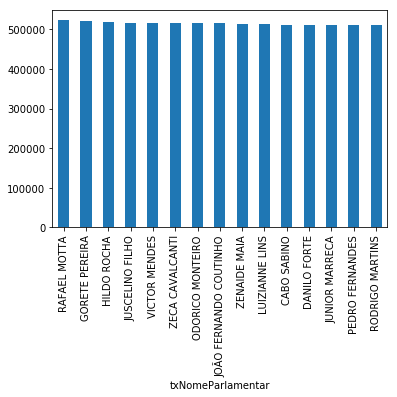

In [8]:
ceap_deputado_2018[:15].plot.bar()

Deputados que menos gastaram no ano de 2018

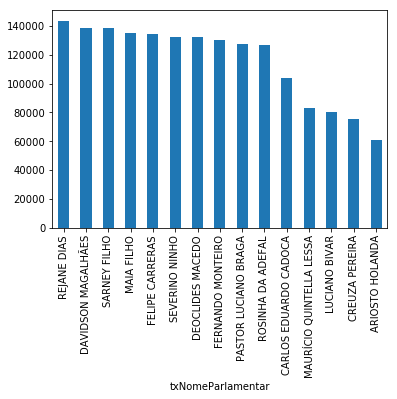

In [9]:
ceap_deputado_2018[-15:].plot.bar()

In [10]:
ceap_deputado_2019 = df_deputados_nordeste_2019.groupby(df_deputados_nordeste_2019['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que mais usaram a CEPA em 2019

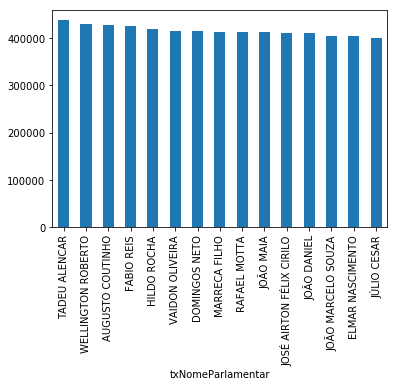

In [11]:
ceap_deputado_2019[:15].plot.bar()

### Analise dos gastos dos deputados nordestidos dentre periodos mensais

- Aqui agrupamos a coluna de valor total da nota fiscal emitida pelo deputado (*vlrLiquido*) pelo número do mês dessa nota. Assim conseguimos visualizar como os gastos totais por mês se comportam no decorrer do ano.

In [12]:
gastos_mensais_2018 = df_deputados_nordeste_2018.groupby(['numMes']).sum()['vlrLiquido']
gastos_mensais_2018

numMes
1     4839066.40
2     5649604.80
3     6390355.89
4     5920585.26
5     6740744.16
6     4475442.11
7     4604694.33
8     3933457.20
9     2851324.04
10    6518182.17
11    7284755.95
12    7466690.40
Name: vlrLiquido, dtype: float64

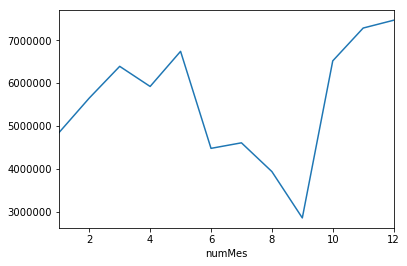

In [13]:
gastos_mensais_2018.plot()

- A partir disso, é possivel verificar que, dentre os meses 6 e 9, os gastos diminuiram drasticamente. Isso aconteceu, possivelmente, pela ocorrência do periodo eleitoral, onde certas atividades são suspensas e/ou possuem limites de gastos que poderão ser custeados pela CEAP.

### Analise de gastos por partido no ano de 2018

- É interessante analisarmos os gastos com a CEAP por partido, tendo em vista que alguns partidos tem muito mais visibilidade e integrantes importantes dentro da camara que outros (o que pode ser visto na Series gerada), mostrando uma grande disparidade de gastos entre os mesmos.  
- Como esses gastos englobam todos os custeios dos deputados, inclusive viagens e etc., vemos como certos partidos tem mais voz e presença.

In [14]:
gasto_partido_2018 = df_deputados_nordeste_2019.groupby('sgPartido').sum()['vlrLiquido'].bb(ascending=False)
gasto_partido_2018

AttributeError: 'Series' object has no attribute 'bb'

In [ ]:
nomes_deputados_nordeste_2018 = [dep['siglaPartido'] for dep in deputados_Nordeste_2018['dados']]
qnt_deputados_partido_2018 = pd.Series(nomes_deputados_nordeste_2018).value_counts()
qnt_deputados_partido_2018

In [ ]:
pd.DataFrame([qnt_deputados_partido_2018, gasto_partido_2018])

In [ ]:
df_deputados_nordeste_2019[['sgPartido','txNomeParlamentar']]

In [ ]:
df_deputados_nordeste_2019.columns